# 📊 Análisis Exploratorio de Datos (EDA)
## Proyecto: Predicción de Churn de Clientes

**Objetivo:** Entender profundamente nuestros datos antes de crear modelos de ML.

**Dataset:** Telco Customer Churn  
---

### ¿Qué es el EDA y por qué es importante?

El **Análisis Exploratorio de Datos** es como ser detective 🔍. Antes de entrenar un modelo, necesitamos:

1. **Conocer nuestros datos**: ¿Qué información tenemos?
2. **Detectar problemas**: Valores faltantes, outliers, errores
3. **Encontrar patrones**: ¿Qué causa el churn?
4. **Preparar estrategia**: ¿Qué features son útiles?

**Regla de oro:** Nunca saltes directo a entrenar modelos sin hacer EDA. El 80% del éxito de ML está en entender los datos.

## 📦 1. Importar Librerías

Primero importamos las herramientas que vamos a usar.

In [1]:
# Manipulación de datos
import pandas as pd  # Para trabajar con tablas de datos (como Excel pero más poderoso)
import numpy as np   # Para operaciones matemáticas y arrays

# Visualización
import matplotlib.pyplot as plt  # Librería base para gráficos
import seaborn as sns           # Hace gráficos bonitos sobre matplotlib
import plotly.express as px     # Gráficos interactivos

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo visual de los gráficos
sns.set_palette('husl')                  # Paleta de colores

# Mostrar todas las columnas (por defecto pandas oculta algunas)
pd.set_option('display.max_columns', None)

# Ignorar warnings molestos (opcional)
import warnings
warnings.filterwarnings('ignore')

print('✅ Librerías importadas correctamente')

✅ Librerías importadas correctamente


## 📂 2. Cargar los Datos

**Concepto clave:** Siempre guardamos los datos originales en `data/raw/` y NUNCA los modificamos. Los datos procesados van en `data/processed/`.

In [2]:
# Ruta al archivo CSV
# IMPORTANTE: Primero copia el CSV a la carpeta data/raw/ de tu proyecto
data_path = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Cargar los datos en un DataFrame de pandas
# DataFrame = tabla de datos (como una hoja de Excel)
df = pd.read_csv(data_path)

print(f'✅ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'   Total de clientes: {df.shape[0]:,}')

✅ Dataset cargado: 7043 filas y 21 columnas
   Total de clientes: 7,043


## 👀 3. Primera Exploración

Veamos cómo se ven nuestros datos.

In [3]:
# Ver las primeras 5 filas
# Esto nos da una idea rápida de qué información tenemos
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 📋 Explicación de las columnas que vemos:

**Información del cliente:**
- `customerID`: ID único de cada cliente
- `gender`: Género (Male/Female)
- `SeniorCitizen`: ¿Es adulto mayor? (0=No, 1=Sí)
- `Partner`: ¿Tiene pareja? (Yes/No)
- `Dependents`: ¿Tiene dependientes? (Yes/No)
- `tenure`: Meses como cliente (muy importante!)

**Servicios contratados:**
- `PhoneService`: Servicio telefónico
- `MultipleLines`: Múltiples líneas
- `InternetService`: Tipo de internet (DSL/Fiber/No)
- `OnlineSecurity`, `OnlineBackup`, etc.: Servicios adicionales

**Información de facturación:**
- `Contract`: Tipo de contrato (Month-to-month/One year/Two year)
- `PaperlessBilling`: Facturación sin papel
- `PaymentMethod`: Método de pago
- `MonthlyCharges`: Cargo mensual ($)
- `TotalCharges`: Cargos totales históricos ($)

**Variable objetivo (lo que queremos predecir):**
- `Churn`: ¿El cliente se fue? (Yes/No) ← ¡ESTA ES NUESTRA META!

In [4]:
# Ver las últimas 5 filas (para detectar si hay patrones raros al final)
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Información general del dataset
# Esto nos dice: tipos de datos, valores no-nulos, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 🔍 ¿Qué debemos observar en .info()?

1. **Non-Null Count**: Si es menor que 7043, hay valores faltantes
2. **Dtype**: Tipo de dato (object=texto, int64=número entero, float64=decimal)
3. **Problemas comunes**: Columnas numéricas guardadas como 'object' (necesitan conversión)

In [6]:
# Estadísticas descriptivas de columnas numéricas
# count: cantidad de valores
# mean: promedio
# std: desviación estándar (qué tan dispersos están los datos)
# min/max: valores mínimo y máximo
# 25%, 50%, 75%: cuartiles (percentiles)

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 🔍 4. Detección de Problemas en los Datos

### 4.1 Valores Faltantes (Missing Values)

In [7]:
# Contar valores faltantes por columna
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Crear una tabla con los resultados
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje': missing_percent.values
})

# Mostrar solo columnas con valores faltantes
missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje', ascending=False)

,Columna,Valores Faltantes,Porcentaje


### 4.2 Detectar problemas con TotalCharges

**Nota:** TotalCharges debería ser numérico, pero puede tener problemas.

In [8]:
# Verificar el tipo de dato de TotalCharges
print(f'Tipo de dato de TotalCharges: {df["TotalCharges"].dtype}')

# Si es 'object' (texto), hay un problema
# Intentemos convertir a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# errors='coerce' convierte valores inválidos a NaN (Not a Number)
# Ahora podemos ver cuántos valores problemáticos había
print(f'\nValores problemáticos en TotalCharges: {df["TotalCharges"].isnull().sum()}')

Tipo de dato de TotalCharges: object

Valores problemáticos en TotalCharges: 11


### 4.3 Duplicados

In [9]:
# Buscar filas duplicadas
duplicates = df.duplicated().sum()
print(f'Filas duplicadas: {duplicates}')

# Verificar IDs duplicados (más importante)
duplicate_ids = df['customerID'].duplicated().sum()
print(f'IDs de cliente duplicados: {duplicate_ids}')

Filas duplicadas: 0
IDs de cliente duplicados: 0


## 📊 5. Análisis de la Variable Objetivo: Churn

**Pregunta clave:** ¿Cuántos clientes se fueron vs. cuántos se quedaron?

In [10]:
# Contar cuántos Yes y No hay en Churn
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print('Distribución de Churn:')
print('-' * 40)
for category, count in churn_counts.items():
    percent = churn_percent[category]
    print(f'{category:5} - {count:4} clientes ({percent:.1f}%)')

print('\n⚠️ IMPORTANTE: Este es un dataset DESBALANCEADO')
print('   Tenemos más clientes que NO hicieron churn que los que SÍ')
print('   Esto afectará cómo entrenemos nuestros modelos después')

Distribución de Churn:
----------------------------------------
No    - 5174 clientes (73.5%)
Yes   - 1869 clientes (26.5%)

⚠️ IMPORTANTE: Este es un dataset DESBALANCEADO
   Tenemos más clientes que NO hicieron churn que los que SÍ
   Esto afectará cómo entrenemos nuestros modelos después


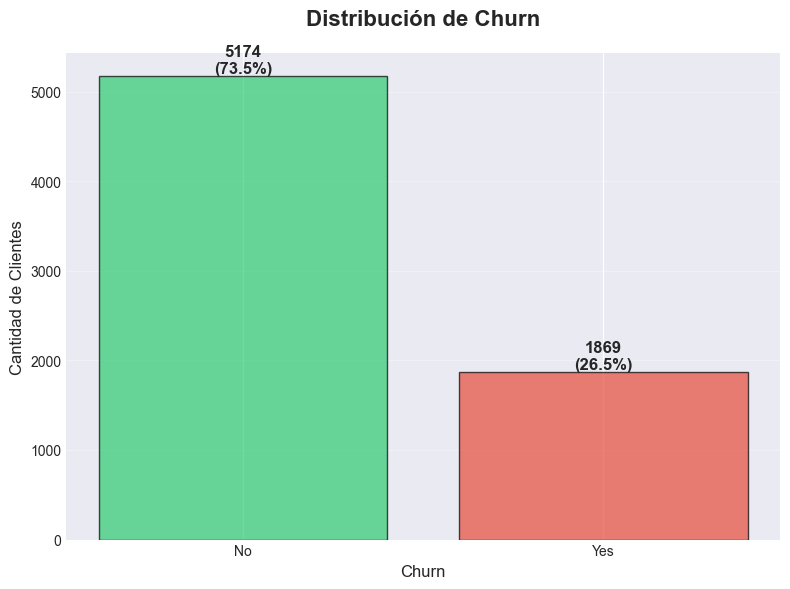


📈 Insight: La tasa de churn es ~27% - ¡esto es alto!
   En la industria de telecomunicaciones, 15-25% es típico


In [ ]:
# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(8, 6))
colors = ["#22a057", '#e74c3c']  # Verde para No, Rojo para Yes
bars = plt.bar(churn_counts.index, churn_counts.values, color=colors, alpha=0.7, edgecolor='black')

# Agregar los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribución de Churn', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('\n📈 Insight: La tasa de churn es ~27% - ¡esto es alto!')
print('   En la industria de telecomunicaciones, 15-25% es típico')

## 📈 6. Análisis de Variables Numéricas

Veamos cómo se distribuyen las variables numéricas.

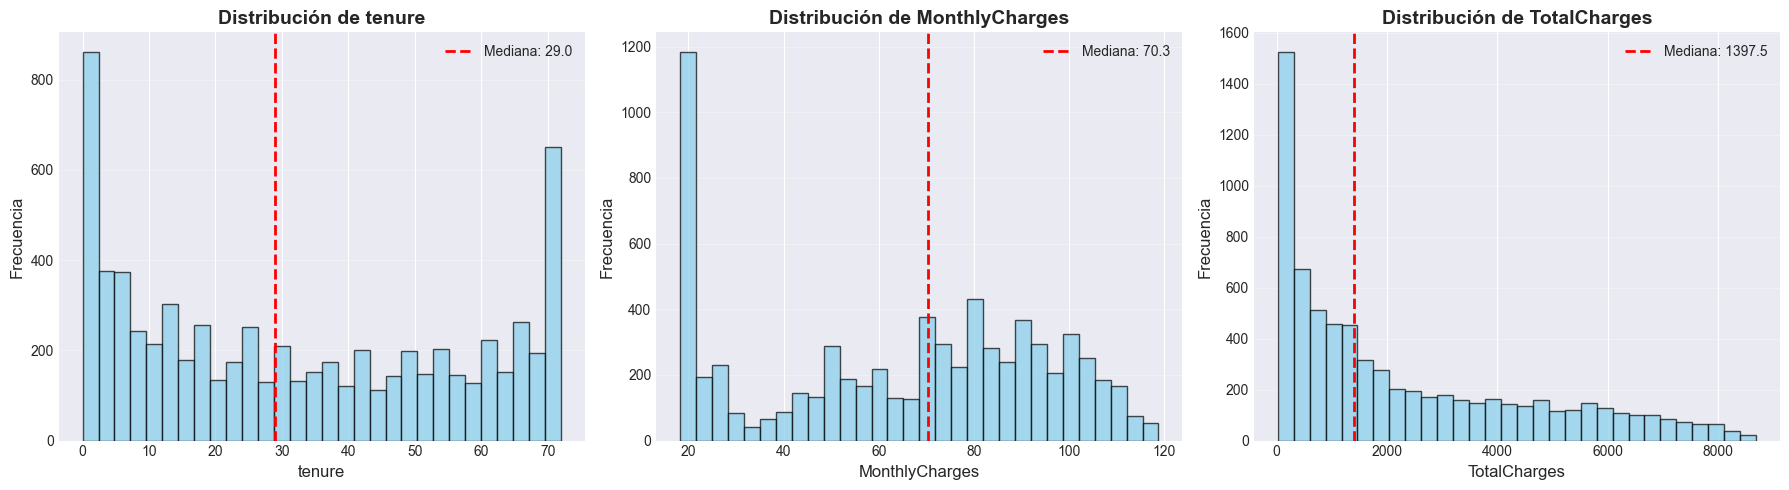

In [12]:
# Identificar columnas numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Crear histogramas para cada variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    # Histograma
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Agregar línea vertical en la mediana
    median = df[col].median()
    axes[i].axvline(median, color='red', linestyle='--', linewidth=2, label=f'Mediana: {median:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

### 📊 Interpretación de las distribuciones:

**tenure (meses como cliente):**
- Si ves muchos clientes con tenure bajo → Problema de retención temprana
- Los picos pueden indicar momentos críticos

**MonthlyCharges (cargo mensual):**
- Distribución de cuánto pagan los clientes cada mes
- ¿Clientes con cargos altos tienen más churn?

**TotalCharges (cargos totales históricos):**
- Relacionado con tenure (más meses = más charges totales)

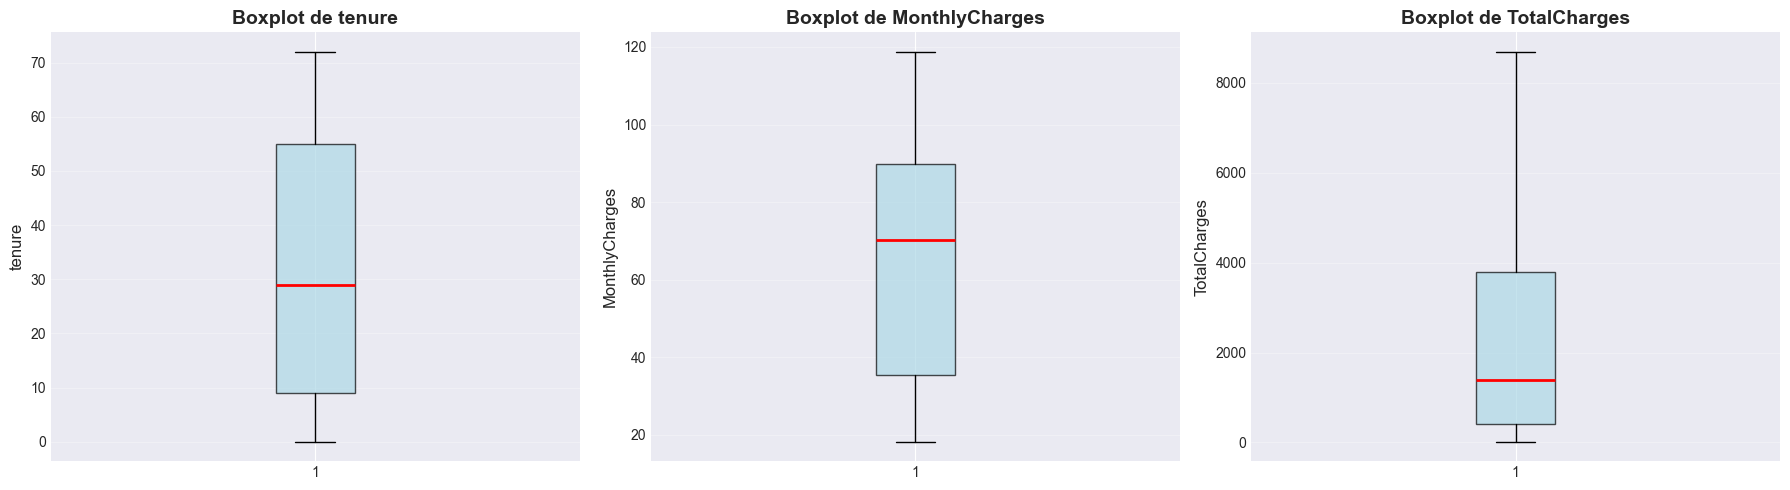


📦 En un boxplot:
   - La caja muestra el 50% central de los datos
   - La línea roja es la mediana
   - Los puntos fuera de los "bigotes" son outliers (valores extremos)


In [13]:
# Box plots (gráficos de caja) - útiles para ver outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n📦 En un boxplot:')
print('   - La caja muestra el 50% central de los datos')
print('   - La línea roja es la mediana')
print('   - Los puntos fuera de los "bigotes" son outliers (valores extremos)')

## 🔗 7. Relación entre Variables Numéricas y Churn

**Pregunta importante:** ¿Cómo se comportan estas variables para clientes que hicieron churn vs. los que no?

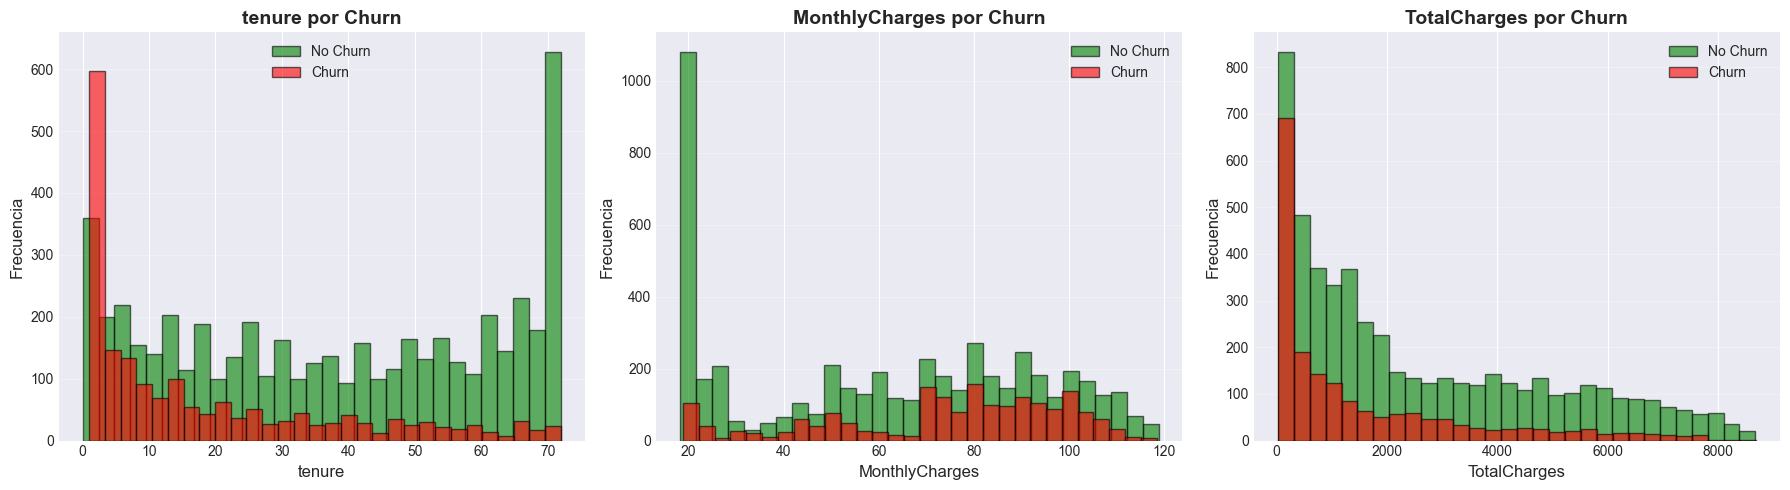

In [14]:
# Comparar distribuciones por Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    # Separar los datos por Churn
    no_churn = df[df['Churn'] == 'No'][col].dropna()
    yes_churn = df[df['Churn'] == 'Yes'][col].dropna()
    
    # Crear histogramas superpuestos
    axes[i].hist(no_churn, bins=30, alpha=0.6, label='No Churn', color='green', edgecolor='black')
    axes[i].hist(yes_churn, bins=30, alpha=0.6, label='Churn', color='red', edgecolor='black')
    
    axes[i].set_title(f'{col} por Churn', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frecuencia', fontsize=12)
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Estadísticas comparativas
print('Comparación de medias por Churn:')
print('=' * 60)

for col in numeric_cols:
    mean_no_churn = df[df['Churn'] == 'No'][col].mean()
    mean_yes_churn = df[df['Churn'] == 'Yes'][col].mean()
    diff = mean_yes_churn - mean_no_churn
    
    print(f'\n{col}:')
    print(f'  No Churn: {mean_no_churn:,.2f}')
    print(f'  Churn:    {mean_yes_churn:,.2f}')
    print(f'  Diferencia: {diff:+,.2f} ({diff/mean_no_churn*100:+.1f}%)')

print('\n💡 Insights importantes:')
print('   - ¿Qué variable tiene la mayor diferencia?')
print('   - Esas serán features importantes para el modelo')

Comparación de medias por Churn:

tenure:
  No Churn: 37.57
  Churn:    17.98
  Diferencia: -19.59 (-52.1%)

MonthlyCharges:
  No Churn: 61.27
  Churn:    74.44
  Diferencia: +13.18 (+21.5%)

TotalCharges:
  No Churn: 2,555.34
  Churn:    1,531.80
  Diferencia: -1,023.55 (-40.1%)

💡 Insights importantes:
   - ¿Qué variable tiene la mayor diferencia?
   - Esas serán features importantes para el modelo


## 🎯 8. Correlaciones

**Correlación** mide qué tan relacionadas están dos variables (-1 a 1):
- **1.0**: Correlación perfecta positiva (cuando una sube, la otra también)
- **0.0**: No hay relación
- **-1.0**: Correlación perfecta negativa (cuando una sube, la otra baja)

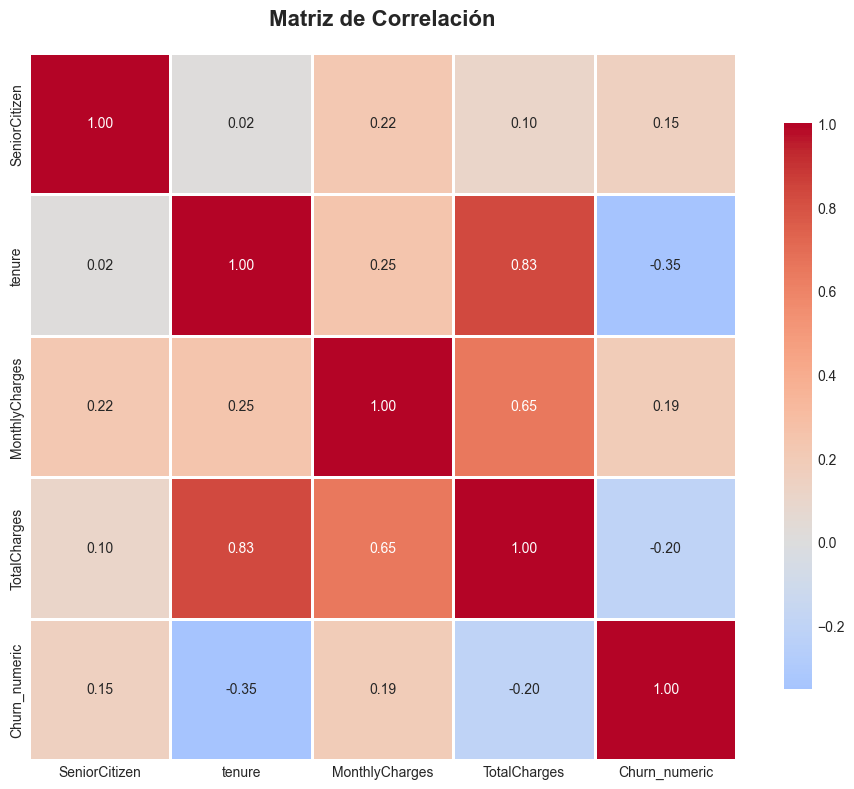


🔥 Interpretación:
   - Colores rojos = correlación positiva fuerte
   - Colores azules = correlación negativa fuerte
   - Blanco = sin correlación

   Busca qué variables tienen mayor correlación con Churn_numeric


In [16]:
# Calcular matriz de correlación
# Primero convertimos Churn a números (Yes=1, No=0)
df_corr = df.copy()
df_corr['Churn_numeric'] = (df_corr['Churn'] == 'Yes').astype(int)
df_corr['SeniorCitizen'] = df_corr['SeniorCitizen'].astype(int)

# Seleccionar solo columnas numéricas
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
correlation_matrix = df_corr[numeric_features].corr()

# Crear heatmap (mapa de calor)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\n🔥 Interpretación:')
print('   - Colores rojos = correlación positiva fuerte')
print('   - Colores azules = correlación negativa fuerte')
print('   - Blanco = sin correlación')
print('\n   Busca qué variables tienen mayor correlación con Churn_numeric')

## 📝 9. Resumen de Hallazgos (Primeros Insights)

Vamos a documentar lo que hemos aprendido hasta ahora.

In [17]:
print('=' * 70)
print('RESUMEN DEL ANÁLISIS EXPLORATORIO - PARTE 1')
print('=' * 70)

print('\n📊 DATOS GENERALES:')
print(f'   • Total de clientes: {len(df):,}')
print(f'   • Features (columnas): {df.shape[1]}')
print(f'   • Tasa de churn: {(df["Churn"] == "Yes").mean()*100:.1f}%')

print('\n⚠️ PROBLEMAS DETECTADOS:')
print(f'   • Valores faltantes en TotalCharges: {df["TotalCharges"].isnull().sum()}')
print(f'   • Dataset desbalanceado: {(df["Churn"] == "No").sum()} No vs {(df["Churn"] == "Yes").sum()} Yes')

print('\n💡 INSIGHTS CLAVE:')
print('   • tenure: Clientes con menos meses tienen más churn')
print('   • MonthlyCharges: Revisar si cargos altos causan churn')
print('   • TotalCharges: Correlacionado con tenure')

print('\n🎯 PRÓXIMOS PASOS:')
print('   1. Analizar variables categóricas (género, servicios, contratos)')
print('   2. Visualizaciones avanzadas')
print('   3. Feature engineering')
print('   4. Preparar datos para modelado')

print('\n' + '=' * 70)

RESUMEN DEL ANÁLISIS EXPLORATORIO - PARTE 1

📊 DATOS GENERALES:
   • Total de clientes: 7,043
   • Features (columnas): 21
   • Tasa de churn: 26.5%

⚠️ PROBLEMAS DETECTADOS:
   • Valores faltantes en TotalCharges: 11
   • Dataset desbalanceado: 5174 No vs 1869 Yes

💡 INSIGHTS CLAVE:
   • tenure: Clientes con menos meses tienen más churn
   • MonthlyCharges: Revisar si cargos altos causan churn
   • TotalCharges: Correlacionado con tenure

🎯 PRÓXIMOS PASOS:
   1. Analizar variables categóricas (género, servicios, contratos)
   2. Visualizaciones avanzadas
   3. Feature engineering
   4. Preparar datos para modelado



## 🎓 Conceptos Aprendidos en este Notebook

✅ **Pandas básico**: `read_csv()`, `head()`, `tail()`, `info()`, `describe()`  
✅ **Detección de problemas**: Valores faltantes, duplicados, tipos de datos incorrectos  
✅ **Visualización**: Histogramas, boxplots, gráficos de barras  
✅ **Análisis de distribuciones**: Entender cómo se comportan las variables  
✅ **Correlaciones**: Medir relaciones entre variables  
✅ **Comparación por grupos**: Analizar diferencias entre Churn Yes/No  

---

## ⏭️ Siguiente Paso

En el próximo notebook analizaremos las **variables categóricas** (género, tipo de contrato, servicios, etc.) y crearemos visualizaciones más avanzadas.

**¡Guarda este notebook y haz commit a GitHub!**